# WeatherPy

## Kevin Krause
## Module 6 Challenge
## May 11, 2023
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as st
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 
## I had to run pip install citypy
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 605


['port-aux-francais',
 'borgarnes',
 'andergrove',
 'stanley',
 'chubbuck',
 'adamstown',
 'margaret river',
 'blackmans bay',
 'lebu',
 'grytviken',
 'bethel',
 'tobelo',
 'ormara',
 'barcelos',
 'lazaro cardenas',
 'fale old settlement',
 'mizdah',
 'olonkinbyen',
 'nkurenkuru',
 'port lincoln',
 'betio village',
 'i-n-salah',
 'murzuq',
 'bredasdorp',
 'nemuro',
 'phan rang-thap cham',
 'waitangi',
 'tweed heads',
 'pasni',
 'edinburgh of the seven seas',
 'vorgashor',
 'utrik',
 "chul'man",
 'kingston',
 'tolanaro',
 'ust-nera',
 'kill devil hills',
 'launceston',
 'letpandan',
 'saipan',
 'port mathurin',
 'pacific grove',
 'cidreira',
 'puerto natales',
 'hawaiian paradise park',
 'yellowknife',
 'taoudenni',
 'georgetown',
 'tiksi',
 'atamyrat',
 'zaraza',
 'vingt cinq',
 'chardara',
 'palmares do sul',
 'madera',
 'aasiaat',
 'rongelap',
 'laguna',
 'merke',
 'ushuaia',
 "'izbat al burj",
 'muisne',
 'okha',
 'abrud',
 'puerto ayora',
 'boyolangu',
 'gilgit',
 'ornskoldsvik',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

#  KEVIN START HERE

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#   city_url = # YOUR CODE HERE
#  Kevin code here ******************
    city_url = url + "appid=" + weather_api_key + "&q=" + city   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#  Kevin code here **********************************
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
#  End Kevin Code **********************************************
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                         "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | borgarnes
Processing Record 3 of Set 1 | andergrove
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | chubbuck
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | tobelo
Processing Record 13 of Set 1 | ormara
Processing Record 14 of Set 1 | barcelos
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | mizdah
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | betio village
Processing Recor

Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | zhangye
Processing Record 42 of Set 4 | batikent
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | mwinilunga
Processing Record 45 of Set 4 | emerald
Processing Record 46 of Set 4 | floro
Processing Record 47 of Set 4 | ribeira brava
Processing Record 48 of Set 4 | chonchi
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 1 of Set 5 | udachny
Processing Record 2 of Set 5 | calama
Processing Record 3 of Set 5 | moree
Processing Record 4 of Set 5 | ponta delgada
Processing Record 5 of Set 5 | bartolome maso
City not found. Skipping...
Processing Record 6 of Set 5 | box elder
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | dwarka
Processing Record 10 of Set 5 | hanceville
Processing Record 11 of Set 5 | badger
Proc

Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | labasa
Processing Record 34 of Set 8 | enewetak
Processing Record 35 of Set 8 | kavaratti
Processing Record 36 of Set 8 | detroit lakes
Processing Record 37 of Set 8 | luanda
Processing Record 38 of Set 8 | hohhot
Processing Record 39 of Set 8 | quang ngai
Processing Record 40 of Set 8 | kyzyl-suu
Processing Record 41 of Set 8 | puerto lempira
Processing Record 42 of Set 8 | alesund
Processing Record 43 of Set 8 | ahau
City not found. Skipping...
Processing Record 44 of Set 8 | tinajo
Processing Record 45 of Set 8 | bratca
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set 8 | tekirova
Processing Record 48 of Set 8 | coahuayana de hidalgo
Processing Record 49 of Set 8 | sinop
Processing Record 0 of Set 9 | chabahar
Processing Record 1 of Set 9 | chibougamau
Processing Record 2 of Set 9 | nema
Processing Record 3 of Set 9 | mesquite
Processing Record 4 of Set 9 | malpica
Processing Record 5 of Set

Processing Record 23 of Set 12 | takamaka
City not found. Skipping...
Processing Record 24 of Set 12 | yeosu
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | colby
Processing Record 27 of Set 12 | qarazhal
Processing Record 28 of Set 12 | lauro de freitas
Processing Record 29 of Set 12 | isola di capo rizzuto
Processing Record 30 of Set 12 | oliveira dos brejinhos
Processing Record 31 of Set 12 | weno
Processing Record 32 of Set 12 | lobujya
Processing Record 33 of Set 12 | lubang
Processing Record 34 of Set 12 | valparaiso
Processing Record 35 of Set 12 | azul
Processing Record 36 of Set 12 | aldinga beach
Processing Record 37 of Set 12 | sunland park
Processing Record 38 of Set 12 | petrolina
Processing Record 39 of Set 12 | talara
Processing Record 40 of Set 12 | al qitena
Processing Record 41 of Set 12 | waingapu
Processing Record 42 of Set 12 | fabens
Processing Record 43 of Set 12 | yugo-kamskiy
Processing Record 44 of Set 12 | tarakan
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# Kevin Code
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.85,96,100,10.29,TF,1683659500
1,borgarnes,64.5383,-21.9206,10.03,83,100,1.66,IS,1683659500
2,andergrove,-21.0833,149.1833,10.36,57,63,4.99,AU,1683659500
3,stanley,54.8680,-1.6985,14.29,85,20,1.03,GB,1683659500
4,chubbuck,42.9208,-112.4661,12.13,56,0,3.60,US,1683659500


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.85,96,100,10.29,TF,1683659500
1,borgarnes,64.5383,-21.9206,10.03,83,100,1.66,IS,1683659500
2,andergrove,-21.0833,149.1833,10.36,57,63,4.99,AU,1683659500
3,stanley,54.8680,-1.6985,14.29,85,20,1.03,GB,1683659500
4,chubbuck,42.9208,-112.4661,12.13,56,0,3.60,US,1683659500


In [8]:
city_data_df.shape

(581, 9)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

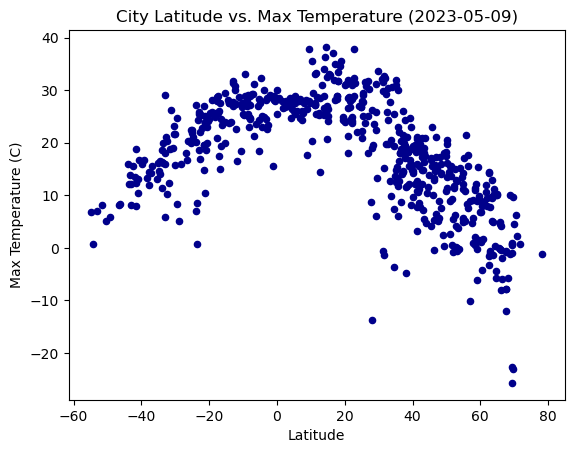

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
#  Kevin Code
ax1 = city_data_df.plot.scatter(x='Lat',
                       y='Max Temp',
                       c='DarkBlue',
                       title='City Latitude vs. Max Temperature (2023-05-09)')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

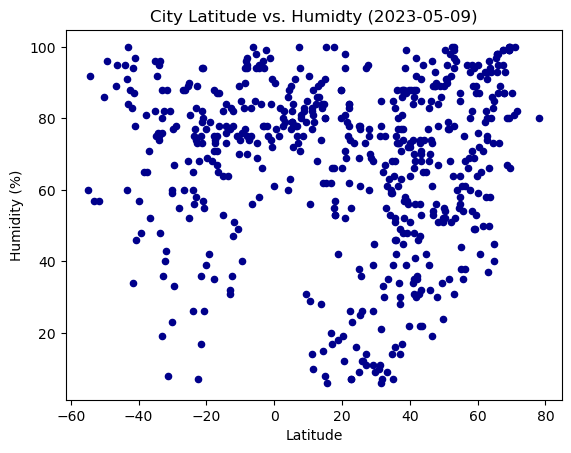

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',
                       y='Humidity',
                       c='DarkBlue',
                       title='City Latitude vs. Humidty (2023-05-09)')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

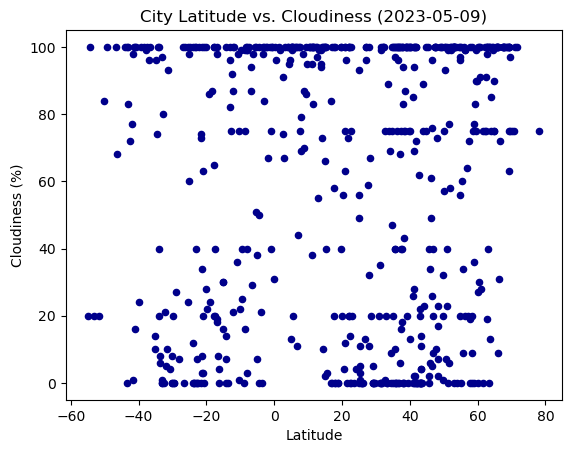

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',
                       y='Cloudiness',
                       c='DarkBlue',
                       title='City Latitude vs. Cloudiness (2023-05-09)')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

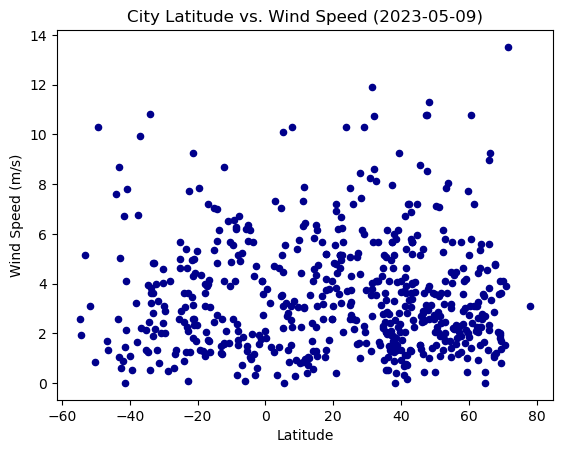

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',
                       y='Wind Speed',
                       c='DarkBlue',
                       title='City Latitude vs. Wind Speed (2023-05-09)')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.85,96,100,10.29,TF,1683659500
1,borgarnes,64.5383,-21.9206,10.03,83,100,1.66,IS,1683659500
2,andergrove,-21.0833,149.1833,10.36,57,63,4.99,AU,1683659500
3,stanley,54.8680,-1.6985,14.29,85,20,1.03,GB,1683659500
4,chubbuck,42.9208,-112.4661,12.13,56,0,3.60,US,1683659500


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,borgarnes,64.5383,-21.9206,10.03,83,100,1.66,IS,1683659500
3,stanley,54.8680,-1.6985,14.29,85,20,1.03,GB,1683659500
4,chubbuck,42.9208,-112.4661,12.13,56,0,3.60,US,1683659500
10,bethel,41.3712,-73.4140,20.79,31,0,4.63,US,1683659326
11,tobelo,1.7284,128.0095,26.67,83,99,1.44,ID,1683659502


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.85,96,100,10.29,TF,1683659500
2,andergrove,-21.0833,149.1833,10.36,57,63,4.99,AU,1683659500
5,adamstown,-25.0660,-130.1015,21.91,52,60,5.69,PN,1683659501
6,margaret river,-33.9500,115.0667,18.56,75,100,10.84,AU,1683659501
7,blackmans bay,-43.0167,147.3167,8.18,84,83,5.01,AU,1683659501


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.85,96,100,10.29,TF,1683659500
2,andergrove,-21.0833,149.1833,10.36,57,63,4.99,AU,1683659500
5,adamstown,-25.0660,-130.1015,21.91,52,60,5.69,PN,1683659501
6,margaret river,-33.9500,115.0667,18.56,75,100,10.84,AU,1683659501
7,blackmans bay,-43.0167,147.3167,8.18,84,83,5.01,AU,1683659501


###  Temperature vs. Latitude Linear Regression Plot

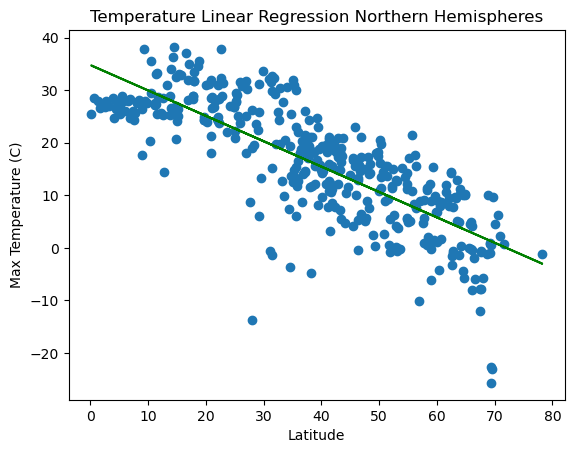

In [17]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature Linear Regression Northern Hemispheres')
plt.show()

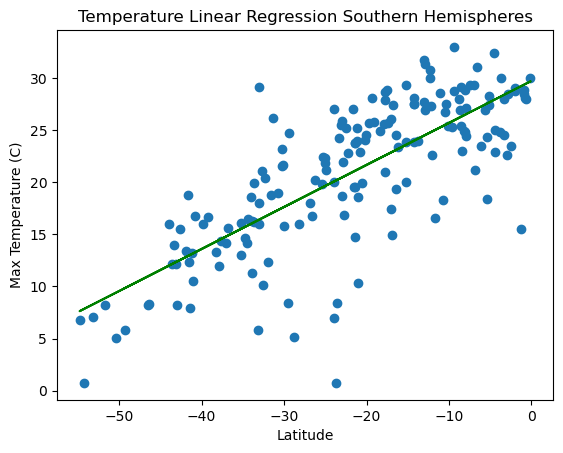

In [18]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature Linear Regression Southern Hemispheres')
plt.show()

**Discussion about the linear relationship:Temperatures between the southern hemisphere and the northern hemisphere almost mirror each other.  But that makes since since the sun would be in the northern and southern hemisperes at the opposite times of the year.  As you move away from the equator in the north the temperatures fall while when you move away from the equator in the south the temperatures rise.

### Humidity vs. Latitude Linear Regression Plot

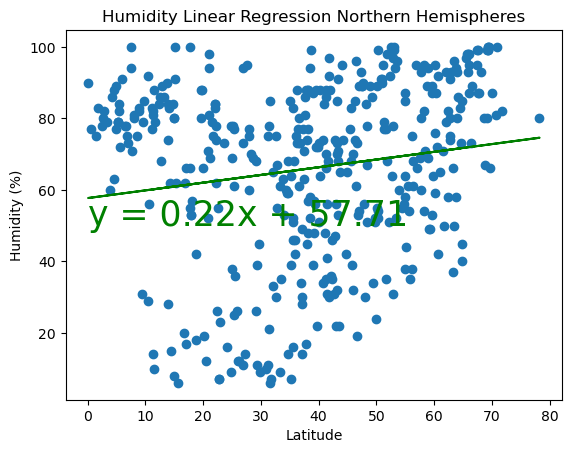

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity Linear Regression Northern Hemispheres')
plt.show()

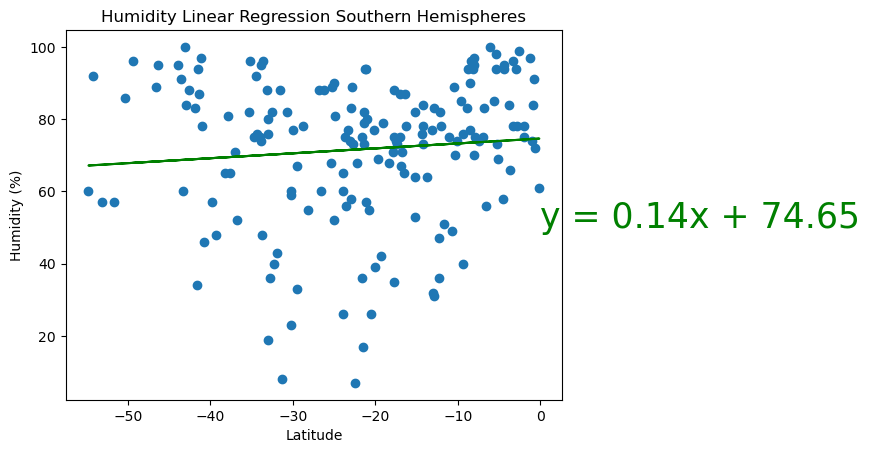

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity Linear Regression Southern Hemispheres')
plt.show()

**Discussion about the linear relationship:  The humidity varies much more with a broader range between high and low in the northern hemispere than in the southern hemispere.  Althoug

### Cloudiness vs. Latitude Linear Regression Plot

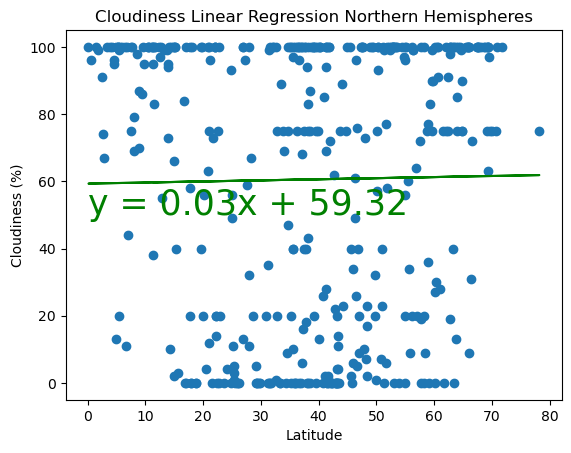

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness Linear Regression Northern Hemispheres')
plt.show()

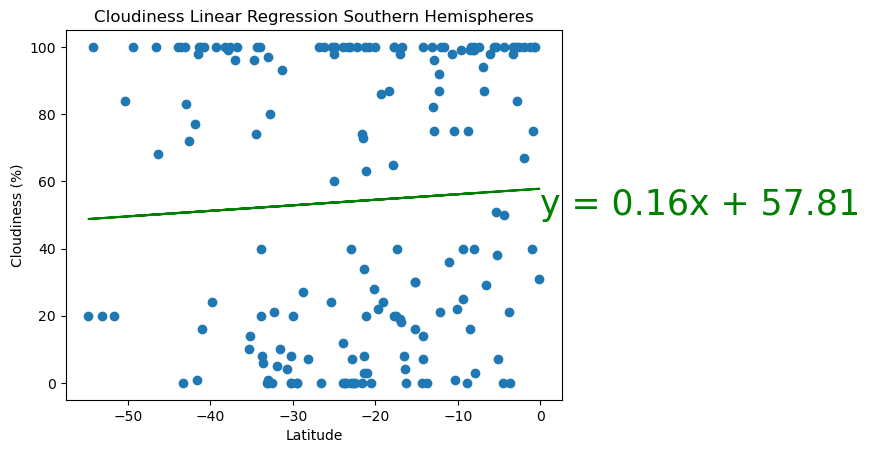

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness Linear Regression Southern Hemispheres')
plt.show()

**Discussion about the linear relationship:  The further north you go in the northern hemisphere the cloudier it gets.  However, in the southern hemispere the cloudiness remains pretty stable.

### Wind Speed vs. Latitude Linear Regression Plot

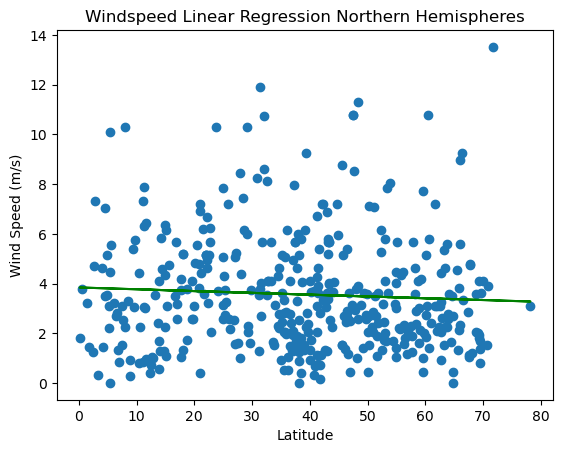

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Windspeed Linear Regression Northern Hemispheres')
plt.show()

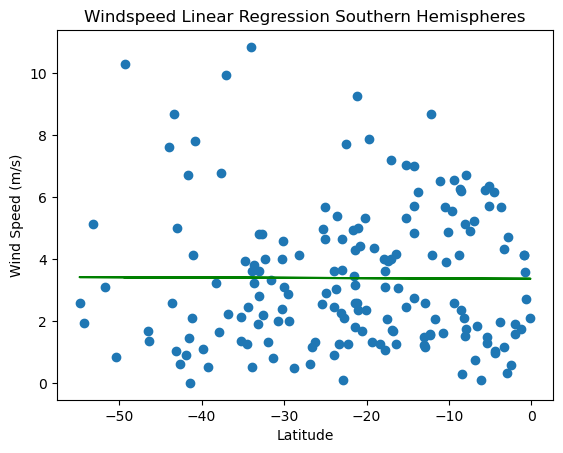

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Windspeed Linear Regression Southern Hemispheres')
plt.show()

**Discussion about the linear relationship:Windspeeds reamin farily constant throughout the world... slightly more variation as you move furhter south of the equator.